# 2.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

marks = np.array([4.2, 2.3, 5.6, 4.5, 4.8, 3.9, 5.9, 2.4, 5.9, 6, 4, 3.7, 5, 5.2, 4.5, 3.6, 5, 6, 2.8, 3.3, 5.5, 4.2, 4.9, 5.1])

## a)

In [3]:
mean = marks.mean()
median = np.median(marks)
print('before: mean={:.3f}, median={:.3f}'.format(mean, median))

# decrease three marks below the mean (to minimum value)
marks2 = np.copy(marks)
marks2[0] = 1
marks2[3] = 1
marks2[-3] = 1

mean = marks2.mean()
median = np.median(marks2)
print('after: mean={:.3f}, median={:.3f}'.format(mean, median))

before: mean=4.513, median=4.650
after: mean=4.100, median=4.650


## b)

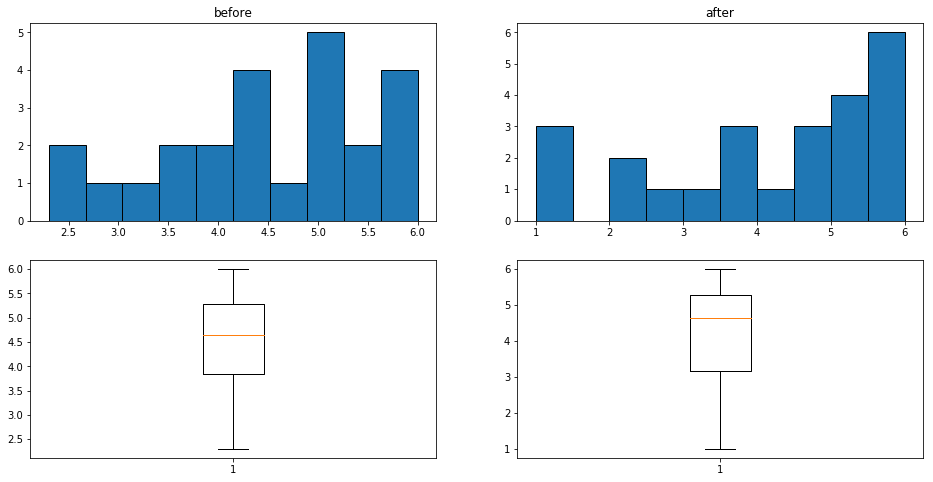

In [5]:
matplotlib.rcParams['figure.figsize'] = [16, 8]

plt.subplot(221)
plt.hist(marks, edgecolor='black')
plt.title('before')

plt.subplot(222)
plt.hist(marks2, edgecolor='black')
plt.title('after')

plt.subplot(223)
plt.boxplot(marks)

plt.subplot(224)
plt.boxplot(marks2)

plt.show()

# 2.2

In [50]:
schlamm = pd.read_csv('klaerschlamm.csv', sep=' ', index_col=0)
schlamm = schlamm.drop('Labor', 1)

## a)

Pr1 mean: 246.143, median: 244.000, diff: 2.143
Pr2 mean: 511.429, median: 521.000, diff: 9.571
Pr3 mean: 443.429, median: 446.000, diff: 2.571
Pr4 mean: 389.238, median: 390.000, diff: 0.762
Pr5 mean: 188.238, median: 188.000, diff: 0.238
Pr6 mean: 394.857, median: 385.000, diff: 9.857
Pr7 mean: 465.524, median: 481.000, diff: 15.476
Pr8 mean: 449.952, median: 451.000, diff: 1.048
Pr9 mean: 388.905, median: 369.000, diff: 19.905


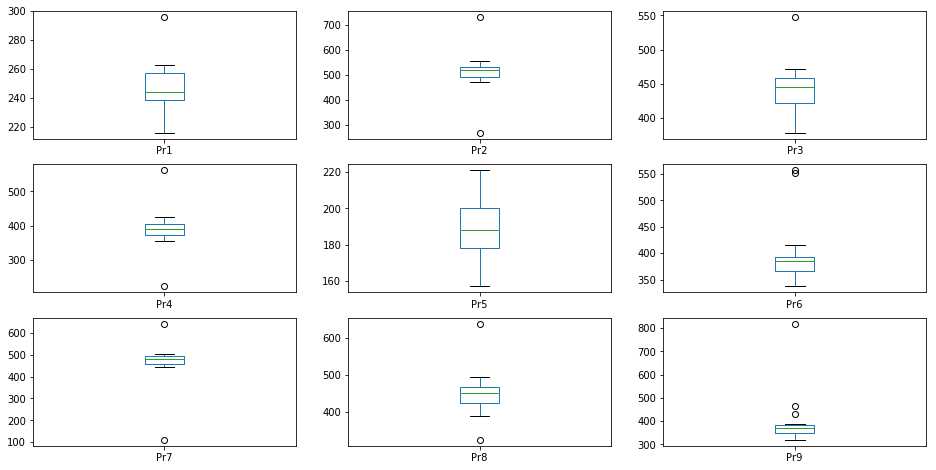

In [31]:
grid = 330
i = 1
for probe in schlamm:
    plt.subplot(grid+i)
    schlamm[probe].plot(kind='box')
    mean = schlamm[probe].mean()
    median = schlamm[probe].median()
    print('Pr{} mean: {:.3f}, median: {:.3f}, diff: {:.3f}'.format(i, mean, median, abs(mean-median)))
    i += 1
plt.show()

- Ausreisser: 1, 2, 3, 4, 6, 7, 8, 9 (alle ausser 5)
- Grosse Differenz Mean/Median: 2, 6, 7, 9
- Konzentration < 400mg/kg: 1, 4, 5, (6)

## b)

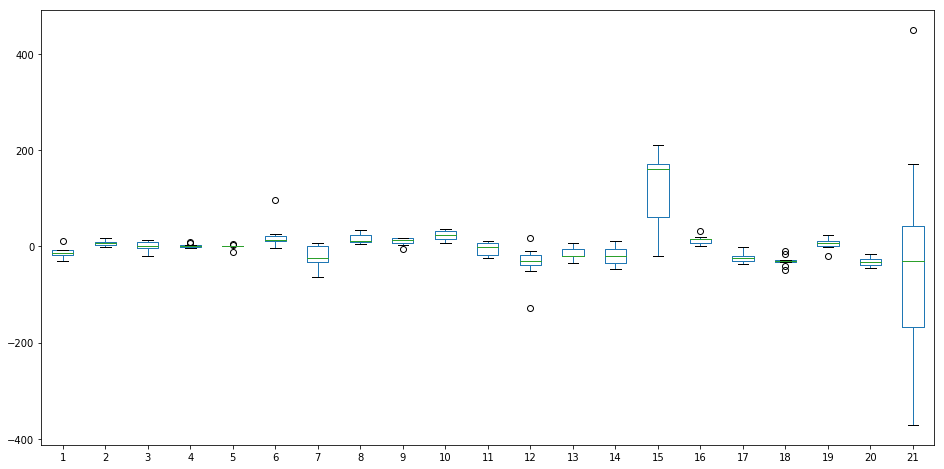

In [74]:
schlamm_centered = schlamm - schlamm.median()
schlamm_centered.T.plot(kind='box')
plt.show()

- systematische Fehler: 15, 21 (grosser Interquartilsabstand)
- grosse Zufallsfehler: 6, 12 (einzelne Ausreisser)
- gute Analysequalität: 2, 4, 5, 9, 10, 20 (sehr geringe Spanne, selbst inkl. Ausreisser)

# 2.3

- 1: c
- 2: b
- 3: a

# 2.4

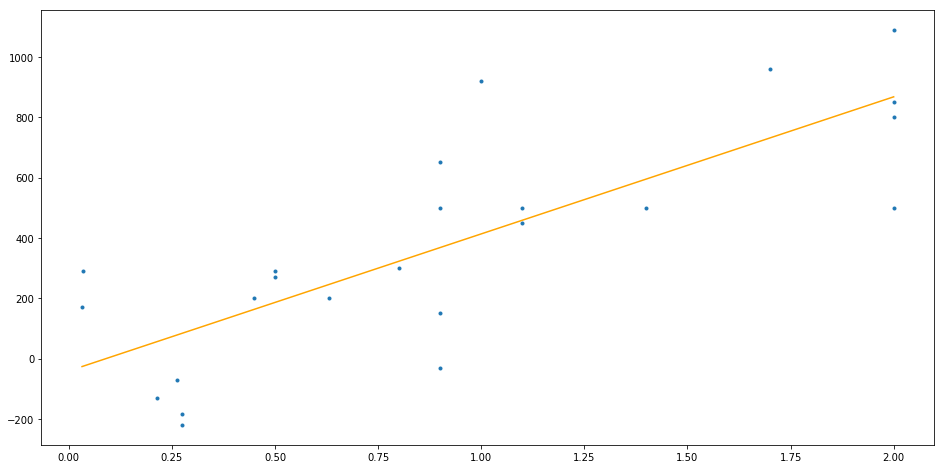

correlation: 0.790


In [272]:
# a)
hubble = pd.read_csv('hubble.csv', sep=' ')
plt.plot(hubble['distance'], hubble['recession.velocity'], '.')

# b)
b, a = np.polyfit(hubble['distance'], hubble['recession.velocity'], deg=1)
x = np.linspace(hubble['distance'].min(), hubble['distance'].max())
y = a + b*x
plt.plot(x, y, color='orange')
plt.show()

# c)
correlation = hubble.corr().iloc[0, 1]
print('correlation: {:.3f}'.format(correlation))

Es ist eine positive Korrelation feststellbar: Mit wachsender Entfernung nimmt auch die Fluchtgeschwindigkeit zu.

# 2.5
## a)

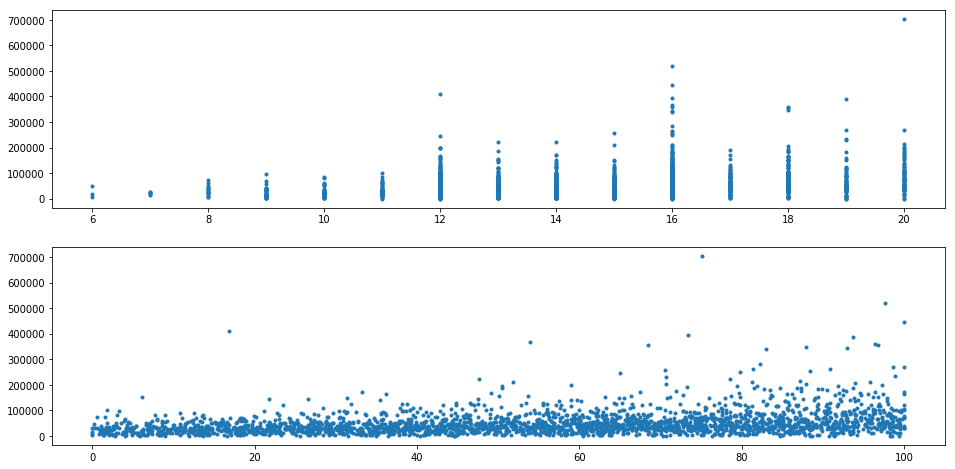

In [110]:
income = pd.read_csv('income.csv', sep=' ')
plt.subplot(211)
plt.plot(income['Educ'], income['Income2005'], '.')
plt.subplot(212)
plt.plot(income['AFQT'], income['Income2005'], '.')
plt.show()

## b)

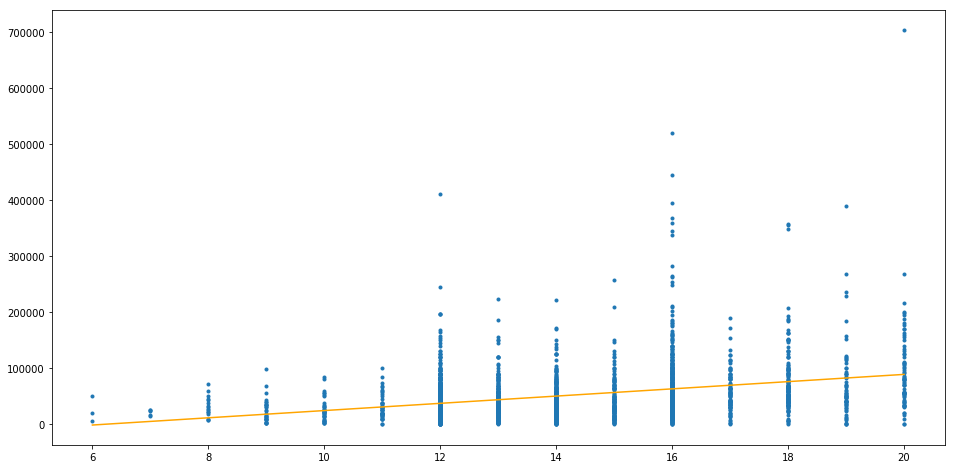

a=-40199.575, b=6451.475


In [266]:
plt.plot(income['Educ'], income['Income2005'], '.')
b, a = np.polyfit(income['Educ'], income['Income2005'], deg=1)
x = np.linspace(income['Educ'].min(), income['Educ'].max())
y = a + b*x
plt.plot(x, y, color='orange')
plt.show()
print('a={:.3f}, b={:.3f}'.format(a, b))

- `a` ist der Basiswert: Gemäss dem Modell würde man mit 0 Jahren Schulbindung ein Einkommen von `a` erhalten.
- `b` ist die Steigung: Pro zusätzlichem Schuljahr ist mir einer Zunahme des Jahresgehalts um `b` zu rechnen.

## c)

In [271]:
correlation_coefficient = np.corrcoef(income['Educ'], income['Income2005'])[0, 1]
print('correlation coefficient: {:.3f}'.format(correlation_coefficient))

correlation coefficient: 0.346


Es ist eine positive Korrelation festzustellen. Das Einkommen dürfte aber nicht nur von diesem Faktor abhängen, zumal es sehr viele Ausreisser gibt.

# 2.6
## a)

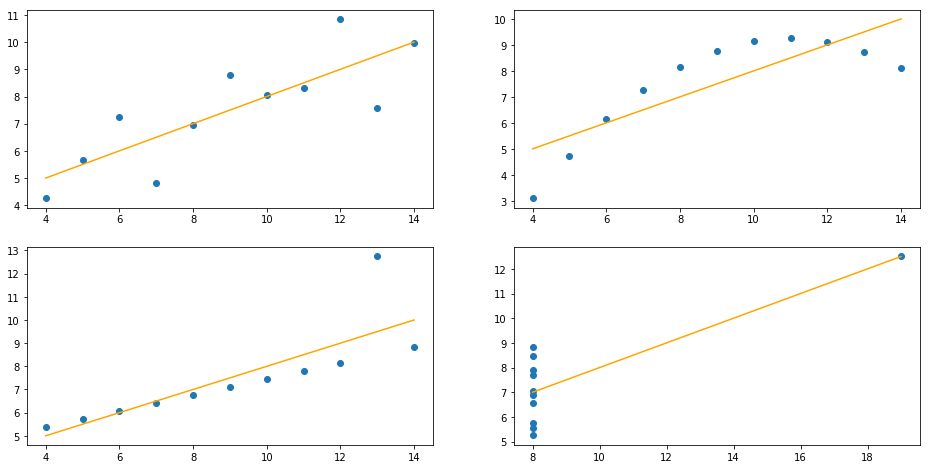

In [140]:
# a)
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

cx = np.linspace(x.min(), x.max())

plt.subplot(221)
plt.scatter(x, y1)
b1, a1 = np.polyfit(x, y1, deg=1)
cy1 = a1 + b1*cx
plt.plot(cx, cy1, color='orange')

plt.subplot(222)
plt.scatter(x, y2)
b2, a2 = np.polyfit(x, y2, deg=1)
cy2 = a2 + b2*cx
plt.plot(cx, cy2, color='orange')

plt.subplot(223)
plt.scatter(x, y3)
b3, a3 = np.polyfit(x, y3, deg=1)
plt.plot(cx, cy3, color='orange')

plt.subplot(224)
plt.scatter(x4, y4)
b4, a4 = np.polyfit(x4, y4, deg=1)
cx4 = np.linspace(x4.min(), x4.max())
cy4 = a4 + b4*cx4
plt.plot(cx4, cy4, color='orange')

plt.show()

## b)

In [142]:
print(b1, a1)
print(b2, a2)
print(b3, a3)
print(b4, a4)

0.5000909090909095 3.000090909090908
0.5000000000000001 3.00090909090909
0.49972727272727313 3.0024545454545444
0.49990909090909086 3.0017272727272735


Die Funktionsparameter sind praktisch gleich.

## c)

In [146]:
print(np.corrcoef(x, y1)[0, 1])
print(np.corrcoef(x, y2)[0, 1])
print(np.corrcoef(x, y3)[0, 1])
print(np.corrcoef(x4, y4)[0, 1])

0.81642051634484
0.8162365060002428
0.8162867394895982
0.8165214368885031


Die Korrelationskoeffizienten sind praktisch gleich.

# 2.7
## a)

In [263]:
data = pd.read_csv('child.csv', sep=',', index_col=0)

## b)

In [213]:
mean = data.describe().loc['mean']
median = data.describe().loc['50%']
nulls = data.isna()

for row in nulls.index.values:
    for col in nulls.columns.values:
        if nulls.loc[row, col]:
            print('[{}, {}] has NaN values'.format(row, col))

[Australia, Physical.activity] has NaN values
[Australia, Smoking] has NaN values
[Australia, Drunkenness] has NaN values
[Australia, Bullying] has NaN values
[Australia, Liking.school] has NaN values
[Canada, Overcrowding] has NaN values
[Canada, Poor.environmental.conditions] has NaN values
[Iceland, Youth.NEET.rate] has NaN values
[Japan, Physical.activity] has NaN values
[Japan, Smoking] has NaN values
[Japan, Drunkenness] has NaN values
[Japan, Bullying] has NaN values
[Japan, Liking.school] has NaN values
[Korea, Overcrowding] has NaN values
[Korea, Poor.environmental.conditions] has NaN values
[Korea, Youth.NEET.rate] has NaN values
[Korea, Physical.activity] has NaN values
[Korea, Smoking] has NaN values
[Korea, Drunkenness] has NaN values
[Korea, Bullying] has NaN values
[Korea, Liking.school] has NaN values
[Luxembourg, Vaccination.rates..pertussis.] has NaN values
[Luxembourg, Vaccination.rates.measles.] has NaN values
[Mexico, Poor.environmental.conditions] has NaN values
[

## c)

In [254]:
non_na_rows = data[~data.isna().any(axis=1)] # axis 1: rows

## d)

In [255]:
max_2_na_cols = data.loc[:, data.isna().sum() <= 2]

## e)

In [261]:
data.fillna(value=0, inplace=True)
# Alle NaN-Einträge werden durch den Wert 0 ersetzt (value=0). Das DataFrame wird direkt angepasst (inplace=True).

## f)

In [264]:
data

,Average.disposable.income,Children.in.poor.homes,Educational.Deprivation,Overcrowding,Poor.environmental.conditions,Average.mean.literacy.score,Literacy.inequality,Youth.NEET.rate,Low.birth.weight,Infant.mortality,...,Vaccination.rates..pertussis.,Vaccination.rates.measles.,Physical.activity,Mortality.rates,Suicide.rates,Smoking,Drunkenness,Teenage.births,Bullying,Liking.school
Australia,20.813221,11.791352,2.2,19.700000,10.500000,520.00,1.610349,7.4,6.4,5.0,...,92.2,94.0,NaN,23.66,8.512646,NaN,NaN,14.3,NaN,NaN
Austria,22.162446,6.166094,0.6,34.014601,20.154186,502.00,1.716942,6.9,6.8,4.2,...,83.0,74.0,19.6,24.57,9.482761,27.1,18.6,12.3,15.6,38.1
Belgium,21.401153,9.974720,1.0,12.614505,29.754526,510.33,1.740258,6.2,7.8,3.7,...,97.0,88.0,19.1,28.97,8.977713,16.7,13.9,7.8,12.2,21.6
Canada,25.606245,15.057585,2.1,NaN,NaN,529.33,1.573912,6.1,5.9,5.3,...,78.0,94.0,23.6,23.43,10.047535,8.6,18.8,13.2,14.0,29.5
Czech Republic,10.849270,10.270000,1.2,58.899347,29.748594,502.00,1.743012,5.3,6.7,3.4,...,98.7,96.6,22.0,24.92,6.212492,21.5,16.8,11.4,5.5,11.7
Denmark,23.175894,2.740000,0.7,17.552965,20.151467,501.00,1.594974,4.3,4.9,4.4,...,95.0,96.0,22.7,22.93,5.942231,15.0,24.8,6.6,8.0,25.6
Finland,22.027651,4.170000,1.0,15.228876,22.802362,552.67,1.475432,5.2,4.1,3.0,...,97.0,97.0,24.8,23.54,12.158687,22.0,22.4,9.7,8.0,16.1
France,18.960382,7.640000,1.2,20.284619,25.830298,493.00,1.728004,6.2,6.8,3.6,...,98.0,87.1,13.5,21.04,4.906704,19.0,11.2,6.7,13.6,21.4
Germany,19.894067,16.289270,0.5,19.967763,37.374708,505.00,1.719702,4.4,6.8,3.9,...,97.8,94.0,17.0,21.23,5.507378,19.5,15.1,9.8,13.9,34.9
Greece,17.183647,13.230296,6.1,54.922056,25.070654,464.00,1.722499,9.8,8.8,3.8,...,88.0,88.0,15.5,23.15,1.263026,16.5,10.3,8.7,22.0,25.6


- MCAR: missing completely at random
- MAR: missing at random
- MNAR: missing not at random

MNAR: Die NaN-Einträge sind nicht rein zufällig. Verschiedene Länder erheben verschiedene Arten von Statistiken. Manche Datenwerte (Spalten) fehlen auch in mehr Ländern als andere.